In [ ]:
### Header: introduce dataset and goals

In [ ]:
How do populations of neurons 

In [ ]:
### Replace this section with the standard setup!

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

base_dir = "/Users/gkocker/Documents/projects/swdb_2024_physiology"
data_dir = os.path.join(base_dir, "data")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [3]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(data_dir))

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

ecephys_sessions.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64.4k/64.4k [00:00<00:00, 290kMB/s]
behavior_sessions.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 562k/562k [00:01<00:00, 517kMB/s]
units.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 134M/134M [00:30<00:00, 4.37MMB/s]
probes.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████

Grab data from a session

In [4]:
session = cache.get_ecephys_session(
           ecephys_session_id=1065437523)

ecephys_session_1065437523.nwb: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3.20G/3.20G [11:38<00:00, 4.58MMB/s]
/opt/homebrew/Caskroom/miniforge/base/envs/swdb/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


The stimulus presentations table is a record of every stimulus we presented to the mouse over the course of this experiment. The different stimuli are indexed by the 'stimulus_block' column. Let's group this dataframe by stimulus block and see what stimulus was shown for each block.

In [105]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.groupby('stimulus_block')[['stimulus_block', 
                                                'stimulus_name', 
                                                'active', 
                                                'duration', 
                                                'start_time']].head()

,stimulus_block,stimulus_name,active,duration,start_time
stimulus_presentations_id,,,,,
0,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.131464
1,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250188,28.882028
2,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250232,29.632680
3,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250186,30.383329
4,0,Natural_Images_Lum_Matched_set_ophys_G_2019,True,0.250229,31.133886
4797,1,spontaneous,False,10.008420,3648.207579
4798,2,gabor_20_deg_250ms,False,0.250208,3658.215999
4799,2,gabor_20_deg_250ms,False,0.250208,3658.466207
4800,2,gabor_20_deg_250ms,False,0.250208,3658.716415


And, let's see the stimuli that were presented:

In [6]:
stimulus_presentations.columns

Index(['stimulus_block', 'image_name', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'flashes_since_change', 'trials_id', 'temporal_frequency', 'rewarded',
       'is_sham_change', 'color', 'stimulus_name', 'spatial_frequency',
       'orientation', 'position_x', 'stimulus_index', 'position_y', 'contrast',
       'active'],
      dtype='object')

In [18]:
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,color,stimulus_name,spatial_frequency,orientation,position_x,stimulus_index,position_y,contrast,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False


Now let's get unit and channel data, sort the units by depth and filter for "good" units.

In [19]:
### get unit and channel data, sort the units by depth and filter for "good" units
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

#first let's sort our units by depth and filter
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

In [64]:
good_units.index.values

array([1068232329, 1068230192, 1068232327, ..., 1068230683, 1068232010,
       1068230684])

Which brain structures were recorded from in this session?

In [20]:
unit_channels.value_counts('structure_acronym')

structure_acronym
SGN      260
CA1      228
DG       167
VISpm    165
APN      151
TH       146
VISam    144
VISp     131
VISl     127
VISal    125
MRN      106
VISrl     99
ProS      98
PP        94
PIL       74
PoT       70
CA3       67
SUB       52
LP        24
MGm       21
NOT       18
RN        17
MB        15
POST       2
LT         2
MGv        1
dtype: int64

In [31]:
### Let's look at population activity in an area of interest
area_of_interest = 'VISp'
area_units = good_units[good_units['structure_acronym'] == area_of_interest]

In [33]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations.head(-5)

,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,color,stimulus_name,spatial_frequency,orientation,position_x,stimulus_index,position_y,contrast,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,5,im047_r,0.250210,8776.735046,8776.985256,522677,522692,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False
13382,5,im047_r,0.250207,8777.485673,8777.735881,522722,522737,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False
13383,5,im047_r,0.250208,8778.236296,8778.486503,522767,522782,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,False


In [ ]:
### What stimuli are presented in these blocks?
np.sort(stimulus_presentations['image_name'].unique())

Text(0, 0.5, 'Unit')

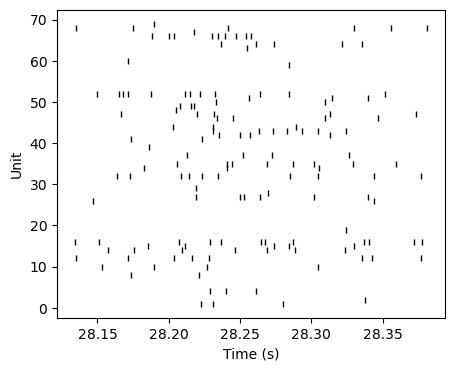

In [54]:
### plot a single-trial raster, population PSTH, and representation matrix
plt.figure(figsize=(5,4))

presentation_idx = 0
start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time (s)')
plt.ylabel('Unit')

Now, plot the first change trial

Text(0, 0.5, 'Unit')

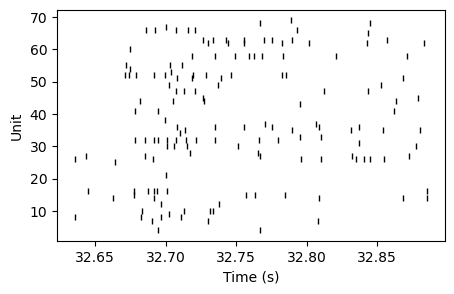

In [59]:

### plot a single-trial raster, population PSTH, and representation matrix
plt.figure(figsize=(5, 3))

change_idx = np.where(stimulus_presentations['is_change'].values)[0]
presentation_idx = change_idx[0]

start_time = stimulus_presentations['start_time'][presentation_idx]
end_time = stimulus_presentations['end_time'][presentation_idx]

unit_num = 0
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    unit_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    unit_num_spikes = len(unit_spike_times)
    
    plt.plot(unit_spike_times, unit_num*np.ones(unit_num_spikes,), 'k|', markersize=5)
    unit_num += 1

plt.xlabel('Time (s)')
plt.ylabel('Unit')

In [119]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

In [135]:
### Plot a set of PSTHs
presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = presentations_sorted['image_name'].unique()
good_stim = [p is np.nan for p in stimuli]
stimuli = stimuli[good_stim]
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

stimulus = stimuli[0]

psths = []
time_before_im = 1
duration = 2

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    presentations = presentations_sorted[presentations_sorted['image_name'] == stim]
    num_presentations = len(presentations)
    
    start_times = presentations['start_time'].values
    
    unit_response, bins = makePSTH(unit_spike_times, 
                                      start_times - time_before_im, 
                                      duration, binSize=0.01)
    
    psths.append(unit_response)

psths = np.array(psths)

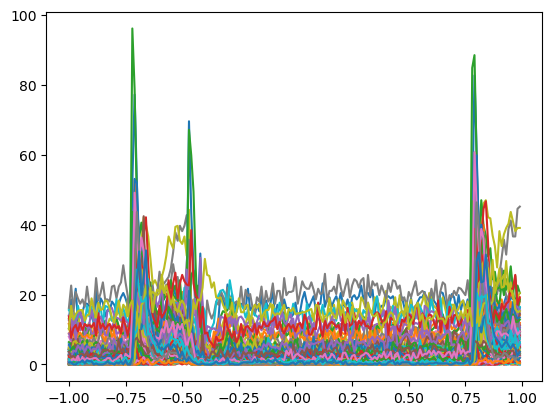

In [136]:
plt.figure()
plt.plot(bins[:-1] - time_before_im, psths.T);
plt.xlabel('Time from change (s)')
plt.ylabel('Firing rate (Hz)')

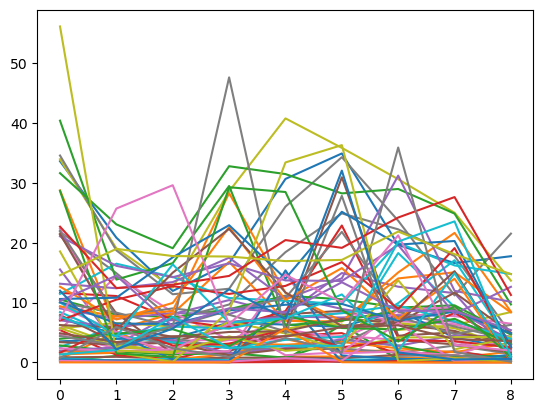

In [104]:
plt.figure()
plt.plot(tuning_curves.T);

In [45]:

# for area in areas_of_interest:
#     area_units = all_area_units[all_area_units['structure_acronym'] == area]
    
#     unit_change_responses = []
    
#     for iu, unit in area_units.iterrows():
#         unit_spike_times = spike_times[iu]
#         unit_num_spikes = len(unit_spike_times)
#         plt.plot(unit_spike_times, iu*np.ones(unit_num_spikes,), 'k|')
        
        
# presentations = presentations.sort_values(by='orientation')
# unit_ids = unit_metrics_VISp.sort_values(by=['pref_ori_dg']).index.values
        
# da = session.presentationwise_spike_counts(np.arange(0,1.99,0.01), presentations.index.values, unit_ids)

# plt.figure(figsize=(10,8))

# firing_rates = da.sum('time_relative_to_stimulus_onset').T / 2
# max_rates = firing_rates.max('unit_id')
# norm_firing_rates = firing_rates / np.tile(max_rates, (len(unit_ids),1))

# plt.imshow(norm_firing_rates, cmap='gray_r', aspect='auto', vmax=1)
# plt.xlabel('Presentation index')
# plt.ylabel('Unit index')
# plt.colorbar(label='Firing rate', aspect=20)
# _ = plt.ylim([0, len(unit_ids)])

28.13146360374384

## Training a classifier on population spiking data

In order to determine how well we can decode the stimulus direction from population activity, we will train a **classifier** on our matrix of firing rates. Whereas regression models try to predict continuous values from the input features, classification models try to predict *labels* (also known as classes) from the input features.

### Support Vector Machines

Let's start with a linear Support Vector Machine (SVM) classifier, which will try to draw linear boundaries between orientation conditions (the labels) in our 94-dimensional firing rate space.

This cartoon shows how we would expect an SVM to behave on a much simpler dataset, which has two dimensions and three conditions:

![SVM illustration](./resources/svm-classifier.png)

SVM computes decision boundaries in feature space that can be used to classify different conditions. If a new data point appears, the SVM classifier will label it based on where it falls with respect to these boundaries.

To train an SVM, we need to import the following methods from `scikit-learn`:

In [172]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [ ]:
### First, we need to create a response matrix and vector of stimulus labels

In [140]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations = stimulus_presentations[stimulus_presentations.stimulus_name == 'Natural_Images_Lum_Matched_set_ophys_G_2019']
stimulus_presentations = stimulus_presentations[stimulus_presentations.active]

num_presentations = len(stimulus_presentations)
stimulus_presentations.head()

4797


,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,...,is_sham_change,color,stimulus_name,spatial_frequency,orientation,position_x,stimulus_index,position_y,contrast,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0,im036_r,0.250188,28.131464,28.381652,60,75,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
1,0,im036_r,0.250188,28.882028,29.132216,105,120,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
2,0,im036_r,0.250232,29.632680,29.882912,150,165,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
3,0,im036_r,0.250186,30.383329,30.633515,195,210,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True
4,0,im036_r,0.250229,31.133886,31.384115,240,255,False,False,False,...,False,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,NaN,NaN,NaN,-99,NaN,NaN,True


In [153]:
labels = []
responses = []

presentation_num = 0

for presentation_idx, presentation in stimulus_presentations.iterrows():    
    start_time = stimulus_presentations['start_time'][presentation_idx]
    end_time = stimulus_presentations['end_time'][presentation_idx]
    duration = end_time - start_time
    
    if np.isnan(duration):
        continue
    
    labels.append(presentation.image_name)
    
    unit_num = 0

    presentation_responses = np.zeros((num_units,))
    
    for iu, unit in area_units.iterrows():
        unit_spike_times = spike_times[iu]
        presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
        
        presentation_responses[unit_num] = len(presentation_spike_times) / duration
        
        unit_num += 1

    responses.append(presentation_responses)
    presentation_num += 1
        
responses = np.array(responses)
labels = np.array(labels)

We will first select a random subset of trials for training the classifier:

In [179]:
total_presentations = responses.shape[0]
num_train = int(total_presentations * 0.5) # Use 50% of trials for training
random_trial_order = np.random.permutation(responses.shape[0])
train_indices = random_trial_order[:num_train]

training_data = responses[train_indices]
training_labels = labels[train_indices]

In [180]:
training_data.shape

(2398, 71)

Next, we'll create the model and fit it to our training data:

In [187]:
svm.SVC?

In [188]:
# clf = svm.SVC(gamma="scale", kernel="linear")
clf = svm.SVC()
clf.fit(responses[train_indices], labels[train_indices])

SVC()

Now that our model has been trained, we can ask it to classify unlabeled data (i.e., the sets of population firing rates that were not included in our original training set):

In [189]:
test_indices = random_trial_order[num_train:]
test_data = responses[test_indices]
predicted_labels = clf.predict(responses[test_indices])

We can compare the predicted labels to the actual labels in order to assess the classifier's performance:

In [190]:
actual_labels = labels[test_indices]

accuracy = np.mean(actual_labels == predicted_labels)
print(accuracy)
# accuracy = 1 - (np.count_nonzero(predicted_labels - actual_labels) / predicted_labels.size)

# plt.figure(figsize=(5,5))

# # add a random offset to make sure the points don't overlap
# plt.scatter(actual_labels + np.random.rand(len(test_indices)) * 20, 
#             predicted_labels + np.random.rand(len(test_indices)) * 20, 
#            s=6)
# plt.plot([0,360],[0,360],'--k', alpha=0.1)

# plt.title(f'Classification accuracy: {accuracy}')
# plt.xlabel('Actual direction (degrees)')
# plt.xlabel('Predicted direction (degrees)')

0.9987494789495623


Here, we see that most of the trials are predicted correctly (values on the diagonal line), but it's making some mistakes (off-diagonal points). This indicates that the firing rates of our recorded population do contain information about grating direction, but there are some trials in which the direction is ambiguous, at least to this type of classifier.

We can get a better sense of classification performance by using the `scikit-learn.model_selection.KFold` iterator to automatically split up the data into "train" and "test" sets for 5 iterations. Note that the model is fit independently on each iteration.

In [192]:
accuracies = []
confusions = []

conditions = np.unique(labels)

for train_indices, test_indices in KFold(n_splits=5, shuffle=True).split(responses):
    
    clf = svm.SVC(gamma="scale", kernel="linear")
    clf.fit(responses[train_indices], labels[train_indices])
    
    test_targets = labels[test_indices]
    test_predictions = clf.predict(responses[test_indices])
    
    accuracy = np.mean(actual_labels == predicted_labels)    
    print(accuracy)
    
    accuracies.append(accuracy)
    confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=conditions))
    
print(f"\nmean accuracy: {np.mean(accuracies)}")
print(f"chance: {1/conditions.size}")

0.9987494789495623
0.9987494789495623
0.9987494789495623
0.9987494789495623
0.9987494789495623

mean accuracy: 0.9987494789495625
chance: 0.1111111111111111


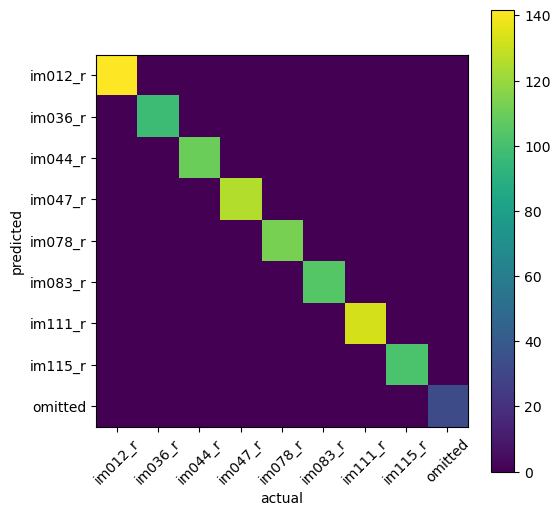

In [204]:
def plot_confusion_matrix(confusions, conditions):
    
    plt.figure(figsize=(6,6))
    
    mean_confusion = np.mean(confusions, axis=0)

    plt.imshow(mean_confusion)
    plt.colorbar()
    
    plt.xticks(range(len(conditions)), conditions, rotation=45)
    plt.yticks(range(len(conditions)), conditions)

    plt.xlabel("actual")
    plt.ylabel("predicted")
    
plot_confusion_matrix(confusions, conditions)

In [195]:
print(labels)

['im036_r' 'im036_r' 'im036_r' ... 'im012_r' 'im012_r' 'im012_r']


### Is the accuracy different for familiar vs novel images?

In [ ]:
### Compute tuning curves - takes a few minutes

presentations_sorted = stimulus_presentations.sort_values(by='image_name')
num_units = len(area_units)

stimuli = np.sort(presentations_sorted['image_name'].unique())
num_stim = len(stimuli)

tuning_curves = np.zeros((num_units, num_stim))
unit_num = 0

durations = []

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    
    for j, stim in enumerate(stimuli):
        presentations = presentations_sorted[presentations_sorted['image_name'] == stim]
        num_presentations = len(presentations)
        
        for presentation_idx, presentation in presentations.iterrows():
            start_time = presentations['start_time'][presentation_idx]
            end_time = presentations['end_time'][presentation_idx]
            duration = end_time - start_time
            durations.append(duration)
            
            presentation_spike_times = unit_spike_times[(unit_spike_times >= start_time) * (unit_spike_times < end_time)]
    
            tuning_curves[unit_num, j] += len(presentation_spike_times) / duration / num_presentations
    unit_num += 1